 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

import warnings

# Use filterwarnings() to hide future warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_ret_path = Path("../MONU-VIRT-FIN-PT-06-2023-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/whale_returns.csv")
whale_ret_df = pd.read_csv(whale_ret_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_ret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_ret_df = whale_ret_df.dropna().copy()

In [5]:
#validate nulls have been dropped
whale_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_ret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_ret_path = Path("../MONU-VIRT-FIN-PT-06-2023-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/algo_returns.csv")
algo_ret_df = pd.read_csv(algo_ret_path, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_ret_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_ret_df = algo_ret_df.dropna().copy()

In [10]:
# validate nulls are dropped
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_ret_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P TSX 60 Closing Prices, sorting index
sp_tsx_path = Path("../MONU-VIRT-FIN-PT-06-2023-U-LOLC/04-Pandas/Homework/Instructions/Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx60_ret_df = pd.read_csv(sp_tsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx60_ret_df.sort_index()
sp_tsx60_ret_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [13]:
# Check Data Types
sp_tsx60_ret_df.dtypes


Close    object
dtype: object

In [14]:
# Fix data types
sp_tsx60_ret_df["Close"] = sp_tsx60_ret_df["Close"].str.replace("$", "")
sp_tsx60_ret_df["Close"] = sp_tsx60_ret_df["Close"].str.replace(",", "")
sp_tsx60_ret_df["Close"] = sp_tsx60_ret_df["Close"].astype("float")


In [15]:
sp_tsx60_ret_df.dtypes

Close    float64
dtype: object

In [16]:
sp_tsx60_ret_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [17]:
# Calculate Daily Returns
sp_tsx60_daily_ret_df = sp_tsx60_ret_df.pct_change()
sp_tsx60_daily_ret_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [18]:
# Drop nulls
sp_tsx60_daily_ret_df.isnull().sum()
sp_tsx60_daily_ret_df.dropna()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx60_daily_ret_df.columns=["sp_tsx60"]
sp_tsx60_daily_ret_df

,sp_tsx60
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [20]:
sp_tsx60_daily_ret_df.isnull().sum()
sp_tsx60_daily_ret_df.dropna()

,sp_tsx60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_ret_df, algo_ret_df, sp_tsx60_daily_ret_df], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

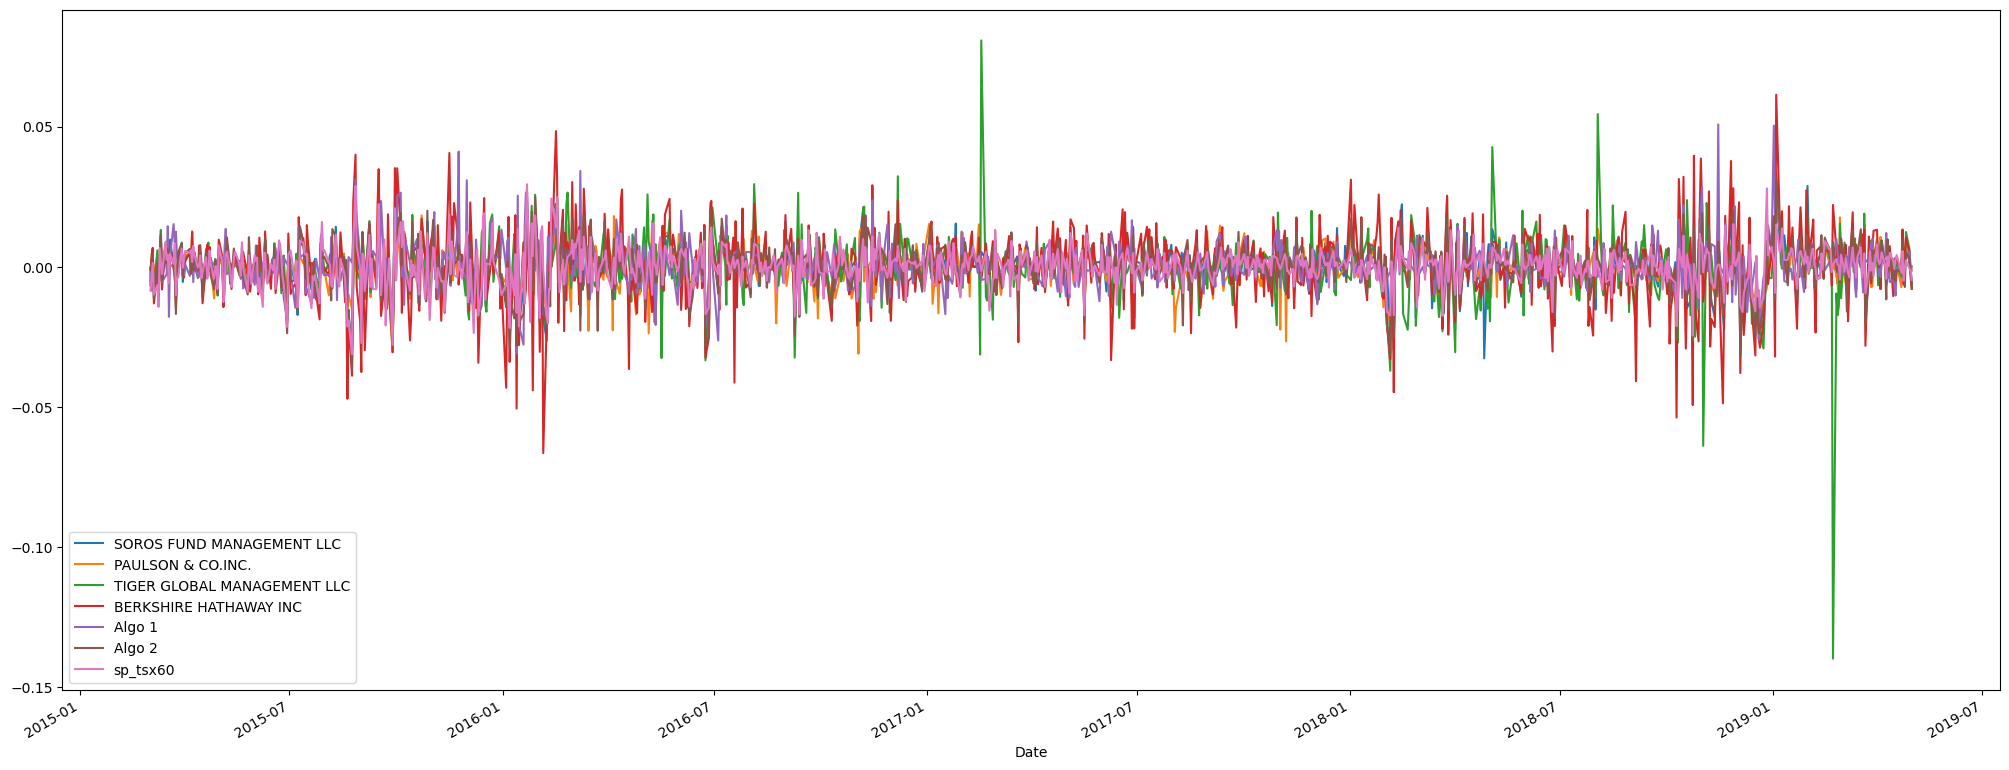

In [22]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(25, 10))

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'All Portfolios Cumulative Returns'}, xlabel='Date'>

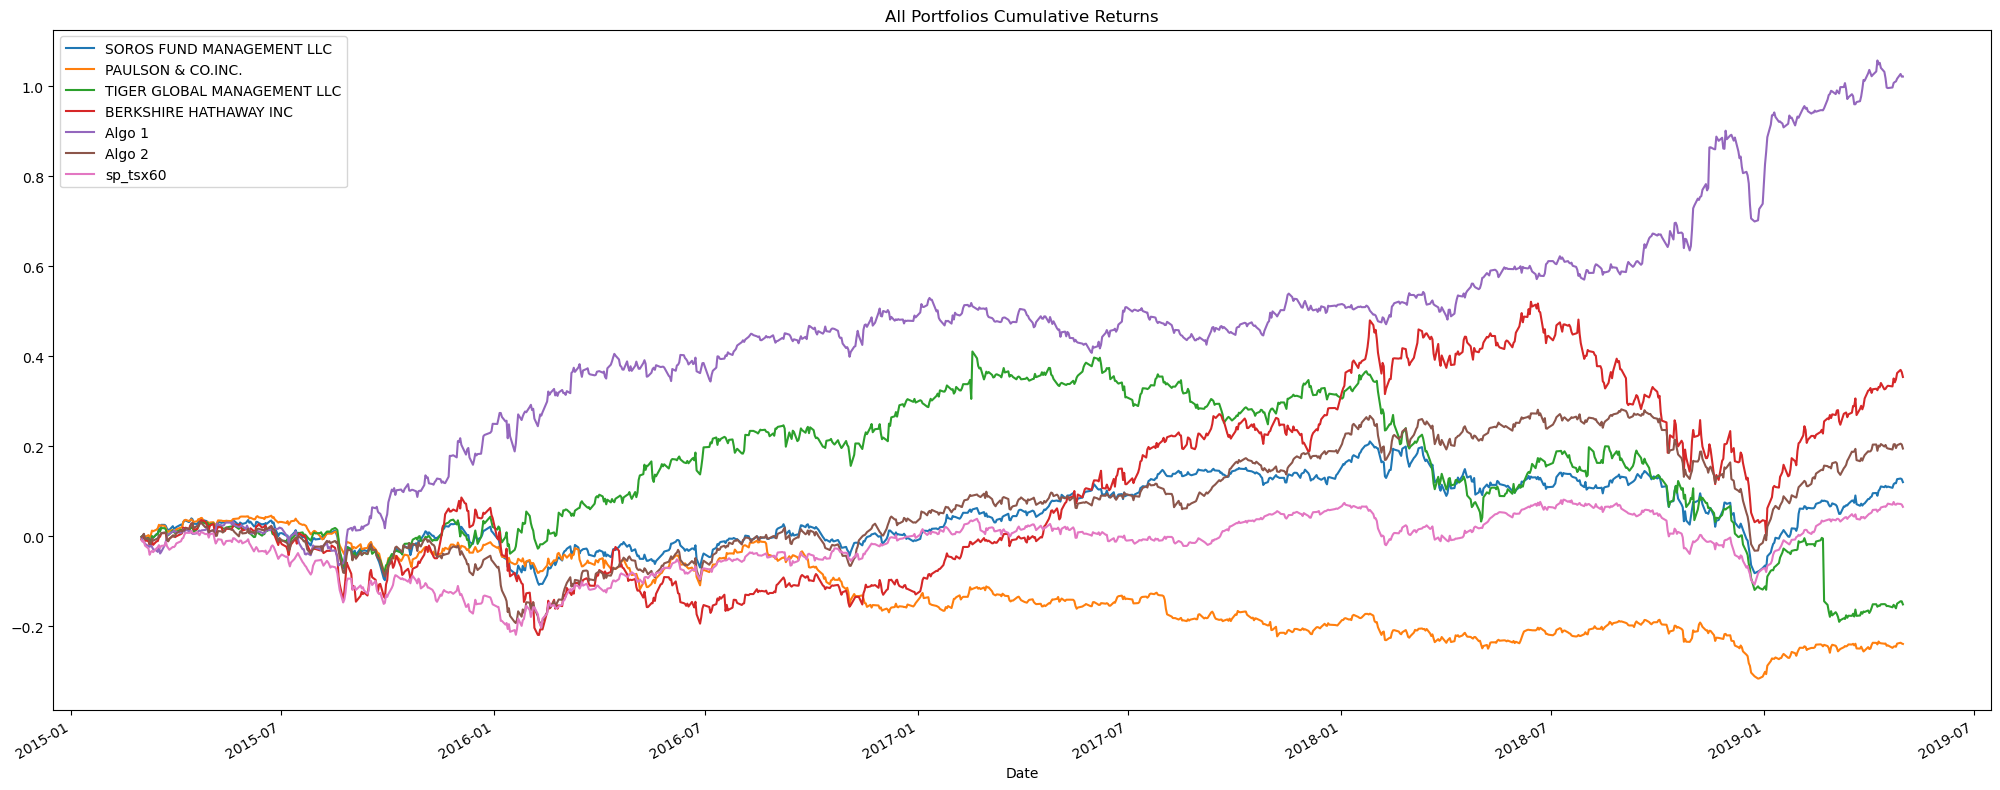

In [23]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(25, 10), title="All Portfolios Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

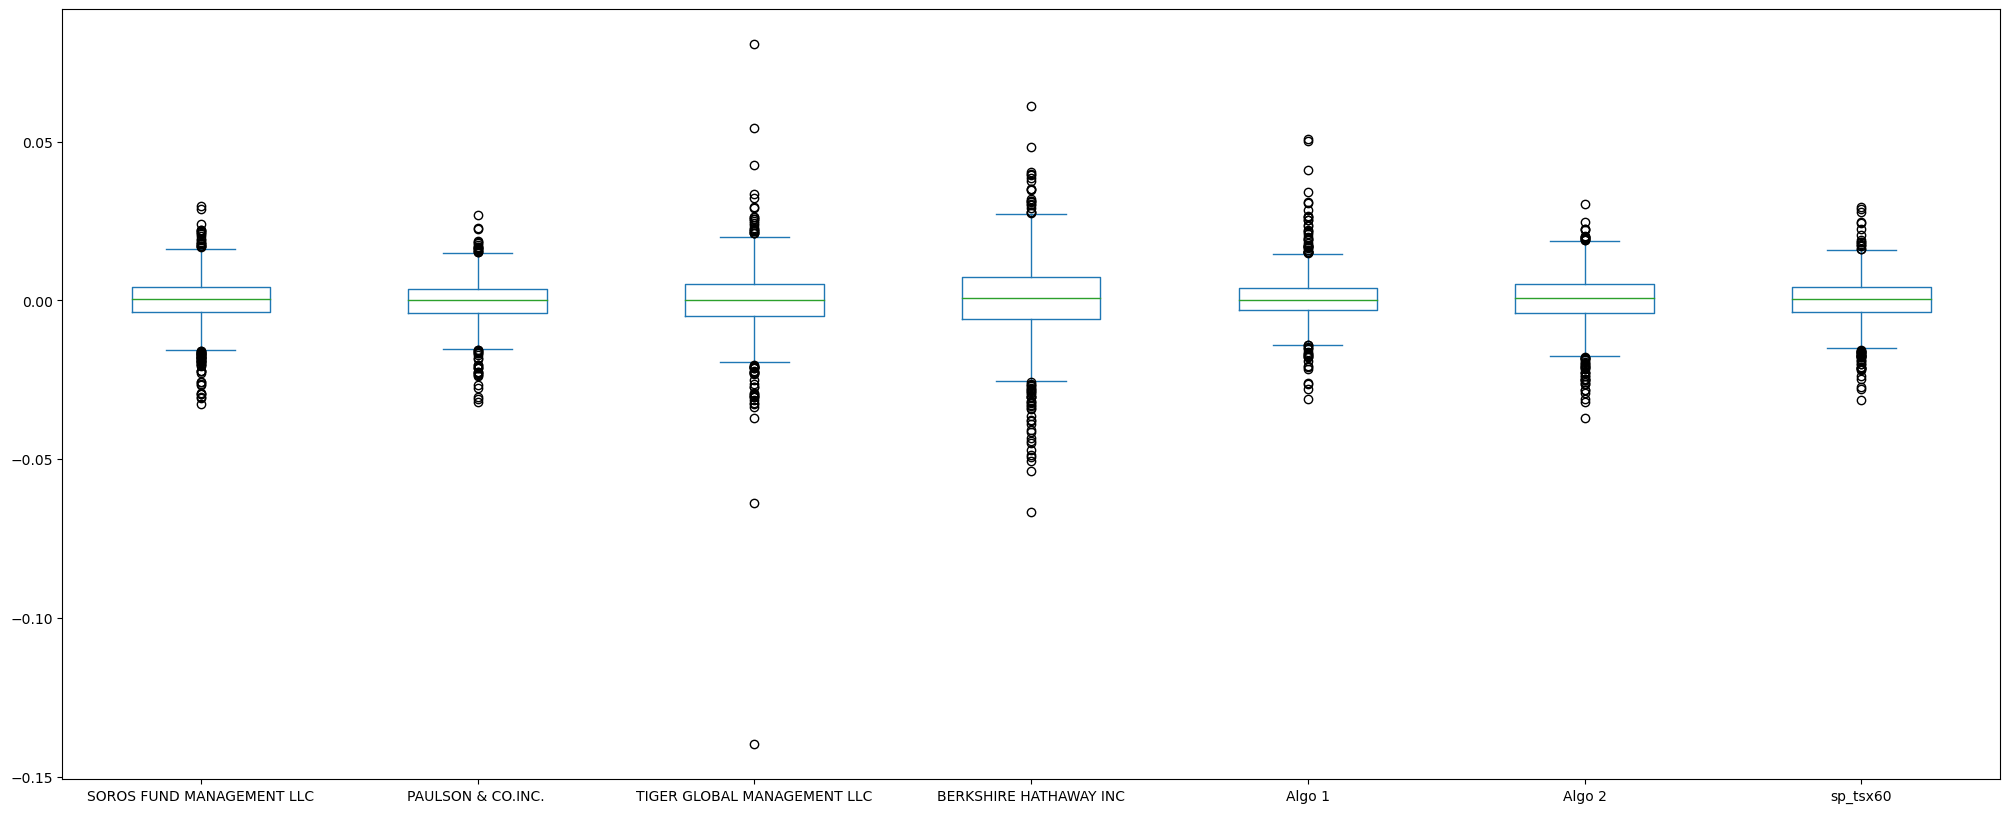

In [24]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(25, 10))

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_tsx60                       0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [26]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx60_std = sp_tsx60_daily_ret_df.std()

In [27]:
# Determine which portfolios are riskier than the S&P TSX 60
combined_std[(combined_std["sp_tsx60"] < combined_std)]

SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx60                       0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

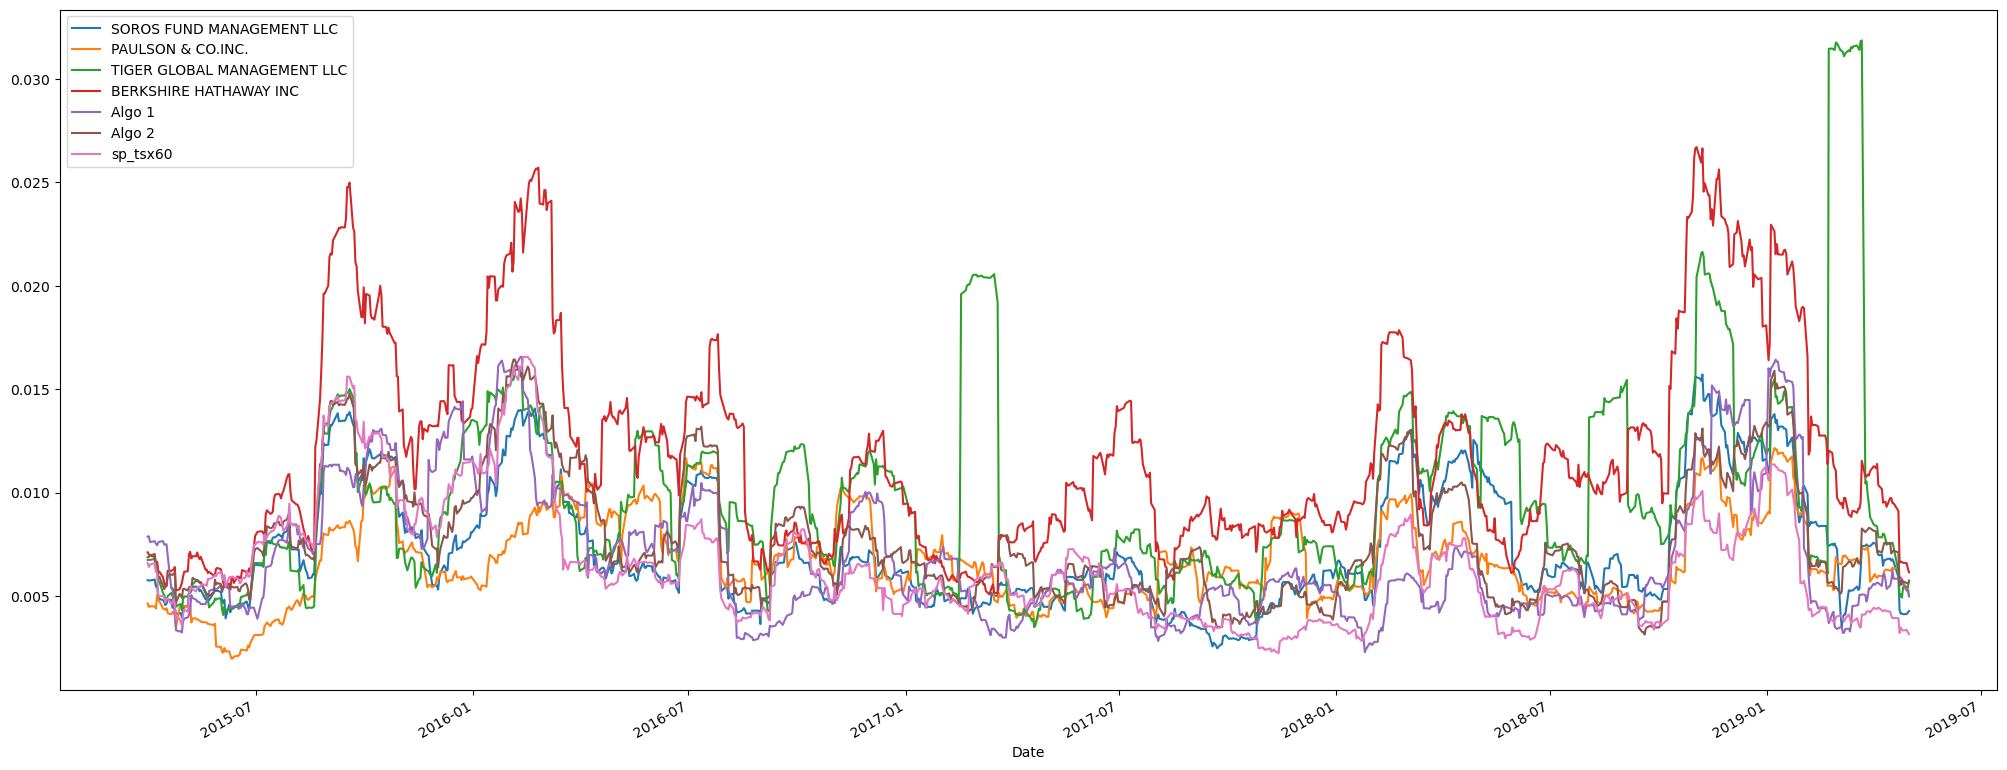

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(25, 10))

### Calculate and plot the correlation

In [30]:
# Calculate the correlation
combined_df.corr()
# Display de correlation matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
sp_tsx60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Rolling Beta of SOROS FUND MANAGEMENT LLC'}, xlabel='Date'>

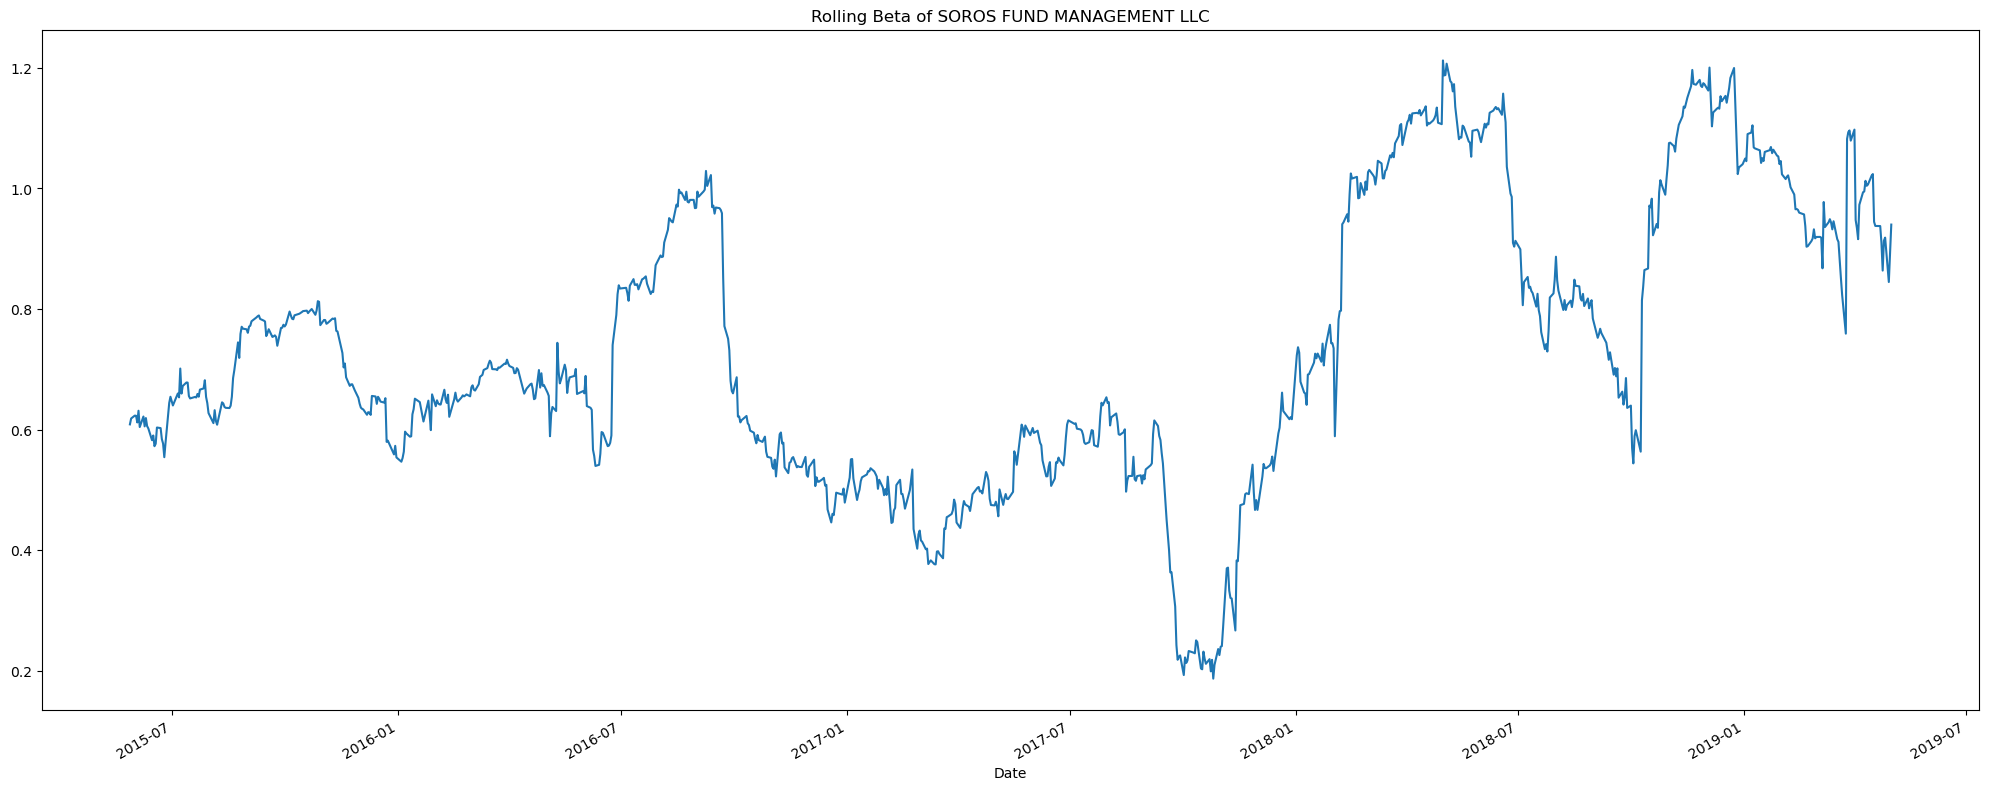

In [31]:
# Calculate covariance of a single portfolio at 60 day window
covar_soros = combined_df["SOROS FUND MANAGEMENT LLC"].rolling(window=60).cov(combined_df["sp_tsx60"])
# Calculate variance of S&P TSX
variance_sp_tsx60 = combined_df["sp_tsx60"].rolling(window=60).var()
# Computing beta
beta_soros = covar_soros/variance_sp_tsx60
# Plot beta trend
beta_soros.plot(figsize=(25, 10), title="Rolling Beta of SOROS FUND MANAGEMENT LLC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [32]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx60                       0.195550
dtype: float64

<Axes: title={'center': 'Sharpe ratio'}>

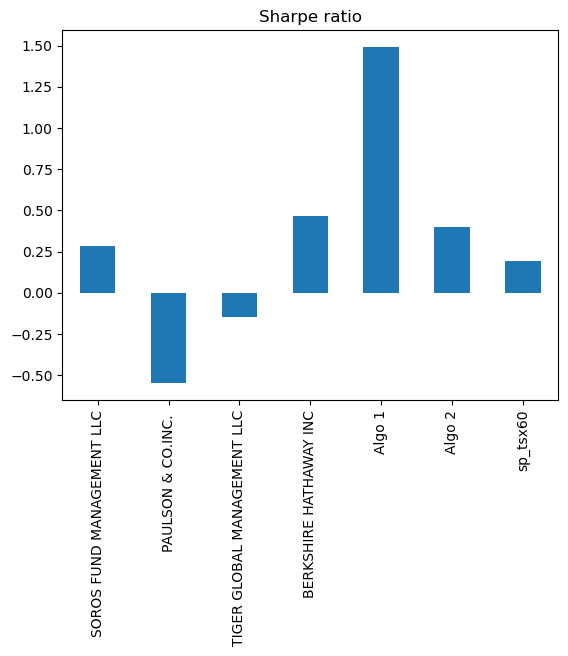

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Both algorithmic strategies outperform the market while Berkshire Hathaway Inc from whales portfolio slightly edged Algo 2. But Algo 1 showed a very impressive excess reward after risk has been factored out from among all the portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [35]:
# Reading data from 1st stock
l_csv = Path("./l_historical.csv")
l_historical_df = pd.read_csv(l_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
l_historical_df = l_historical_df.drop(columns=["Symbol"])
l_historical_df.sort_index()
l_historical_df.head()

,Close
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [36]:
# Reading data from 2nd stock
otex_csv = Path("./otex_historical.csv")
otex_historical_df = pd.read_csv(otex_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_historical_df = otex_historical_df.drop(columns=["Symbol"])
otex_historical_df.sort_index()
otex_historical_df.head()

,Close
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [37]:
# Reading data from 3rd stock
shop_historical_csv = Path("./shop_historical.csv")
shop_historical_df = pd.read_csv(shop_historical_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_historical_df = shop_historical_df.drop(columns=["Symbol"])
shop_historical_df.sort_index()
shop_historical_df.head()

,Close
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [38]:
# Combine all stocks in a single DataFrame
own_portfolio_df = pd.concat([l_historical_df, otex_historical_df, shop_historical_df], axis="columns", join="inner")
own_portfolio_df.sort_index()


,Close,Close,Close
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [39]:
# Reorganize portfolio data by having a column per symbol
own_portfolio_df.columns = ["L", "OTEX", "SHOP"]

In [40]:
own_portfolio_df.head()

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51


In [41]:
# Calculate daily returns
own_portfolio_ret = own_portfolio_df.pct_change()
# Drop NAs
own_portfolio_ret.dropna(inplace=True)
# Display sample data
own_portfolio_ret.head()

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
own_portfolio_weighted = own_portfolio_ret.dot(weights)
own_portfolio_weighted.sum()

0.6983426583779062

In [43]:
cum_ret = (1 + own_portfolio_weighted).cumprod() - 1
# Display sample data
cum_ret.sum()

198.5144628283723

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_ret = pd.concat([own_portfolio_weighted, whale_ret_df, algo_ret_df, sp_tsx60_daily_ret_df], axis="columns", join="inner")
all_portfolio_ret.rename(columns = {0: "OWN PORTFOLIO"}, inplace=True)
all_portfolio_ret.head(10)

,OWN PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,0.000528,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
2018-01-11,0.000213,0.010541,0.011773,-0.002063,0.017662,-0.005614,0.016898,0.002400
2018-01-12,0.004051,0.002590,0.002418,0.003807,0.002594,-0.000875,0.002411,0.001304
2018-01-16,-0.008559,-0.005126,-0.005553,0.009646,-0.011962,0.003931,-0.009533,-0.004455


In [45]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_ret.dropna()
all_portfolio_ret.head()

,OWN PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx60
Date,,,,,,,,
2018-01-03,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [46]:
# Calculate the annualized `std`
annualized_std = all_portfolio_ret.std() * np.sqrt(252)
annualized_std

OWN PORTFOLIO                  0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
sp_tsx60                       0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

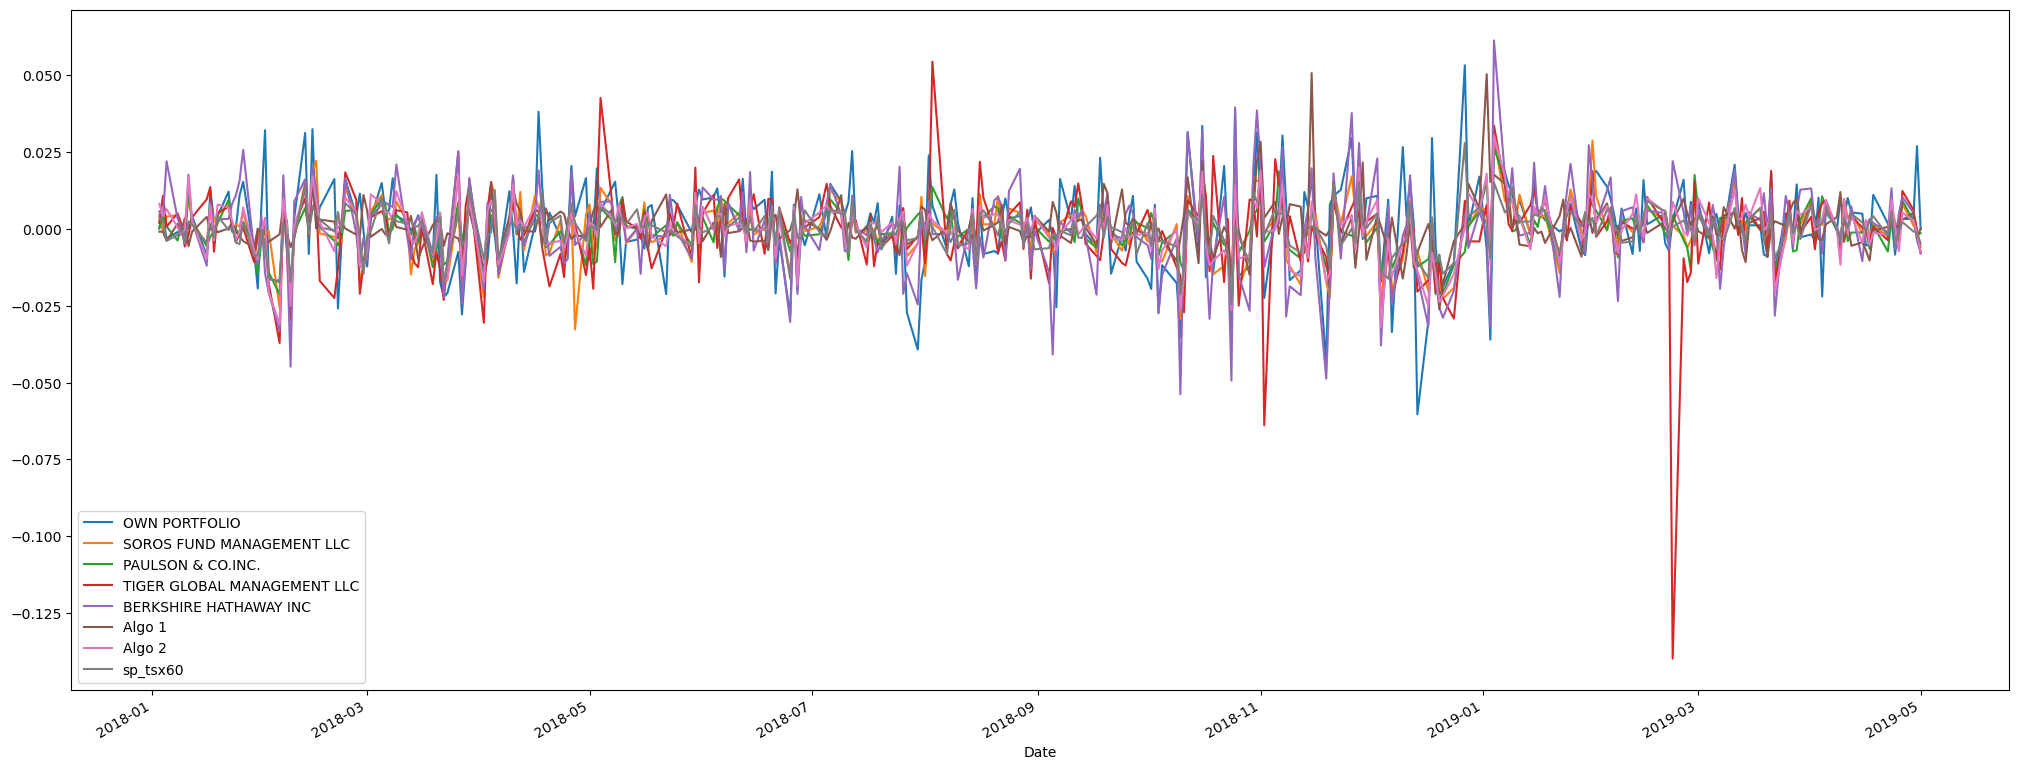

In [47]:
# Calculate rolling standard deviation
all_portfolio_ret.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolio_ret.plot(figsize=(25, 10))

### Calculate and plot the correlation

<Axes: >

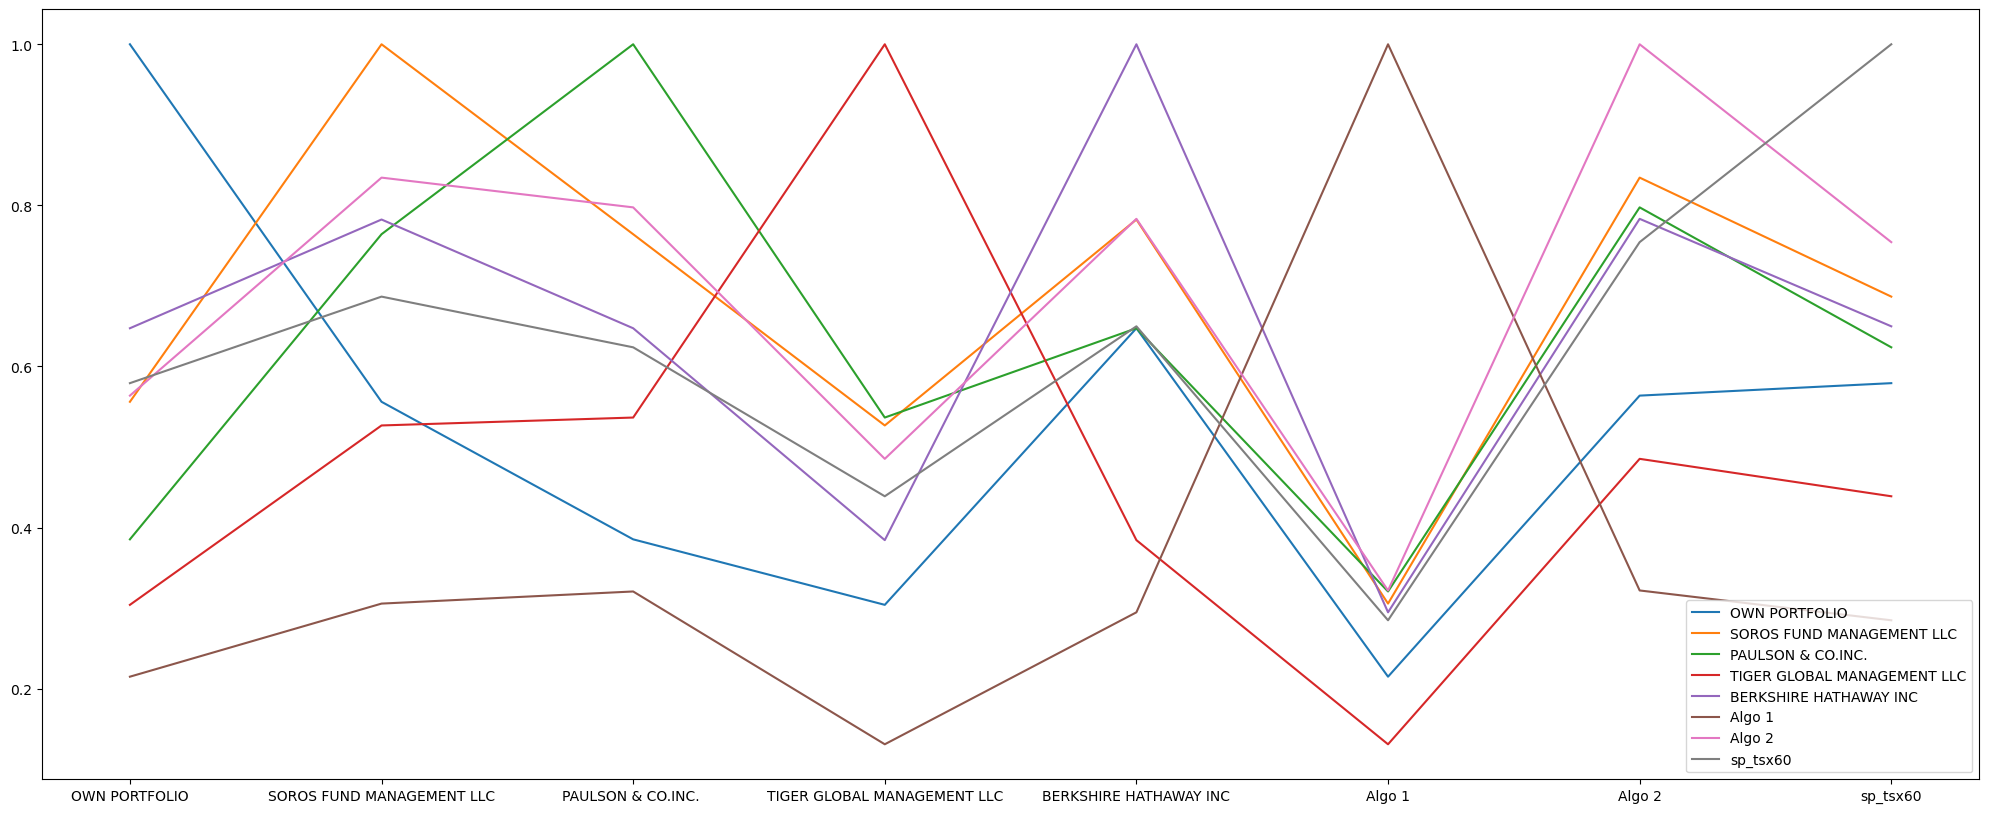

In [48]:
# Calculate and plot the correlation
all_portfolio_ret.corr().plot(figsize=(25, 10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [60]:
# Calculate and plot Beta
covar_own_portfolio = all_portfolio_ret["OWN PORTFOLIO"].cov(all_portfolio_ret["sp_tsx60"])
var_sp_tsx60 = all_portfolio_ret["sp_tsx60"].var()
beta_own_portfolio = covar_own_portfolio/var_sp_tsx60
beta_own_portfolio

1.3109983534075265

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (all_portfolio_ret.mean() * 252) / (all_portfolio_ret.std() * np.sqrt(252))
sharpe_ratio

OWN PORTFOLIO                  1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
sp_tsx60                       0.034651
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

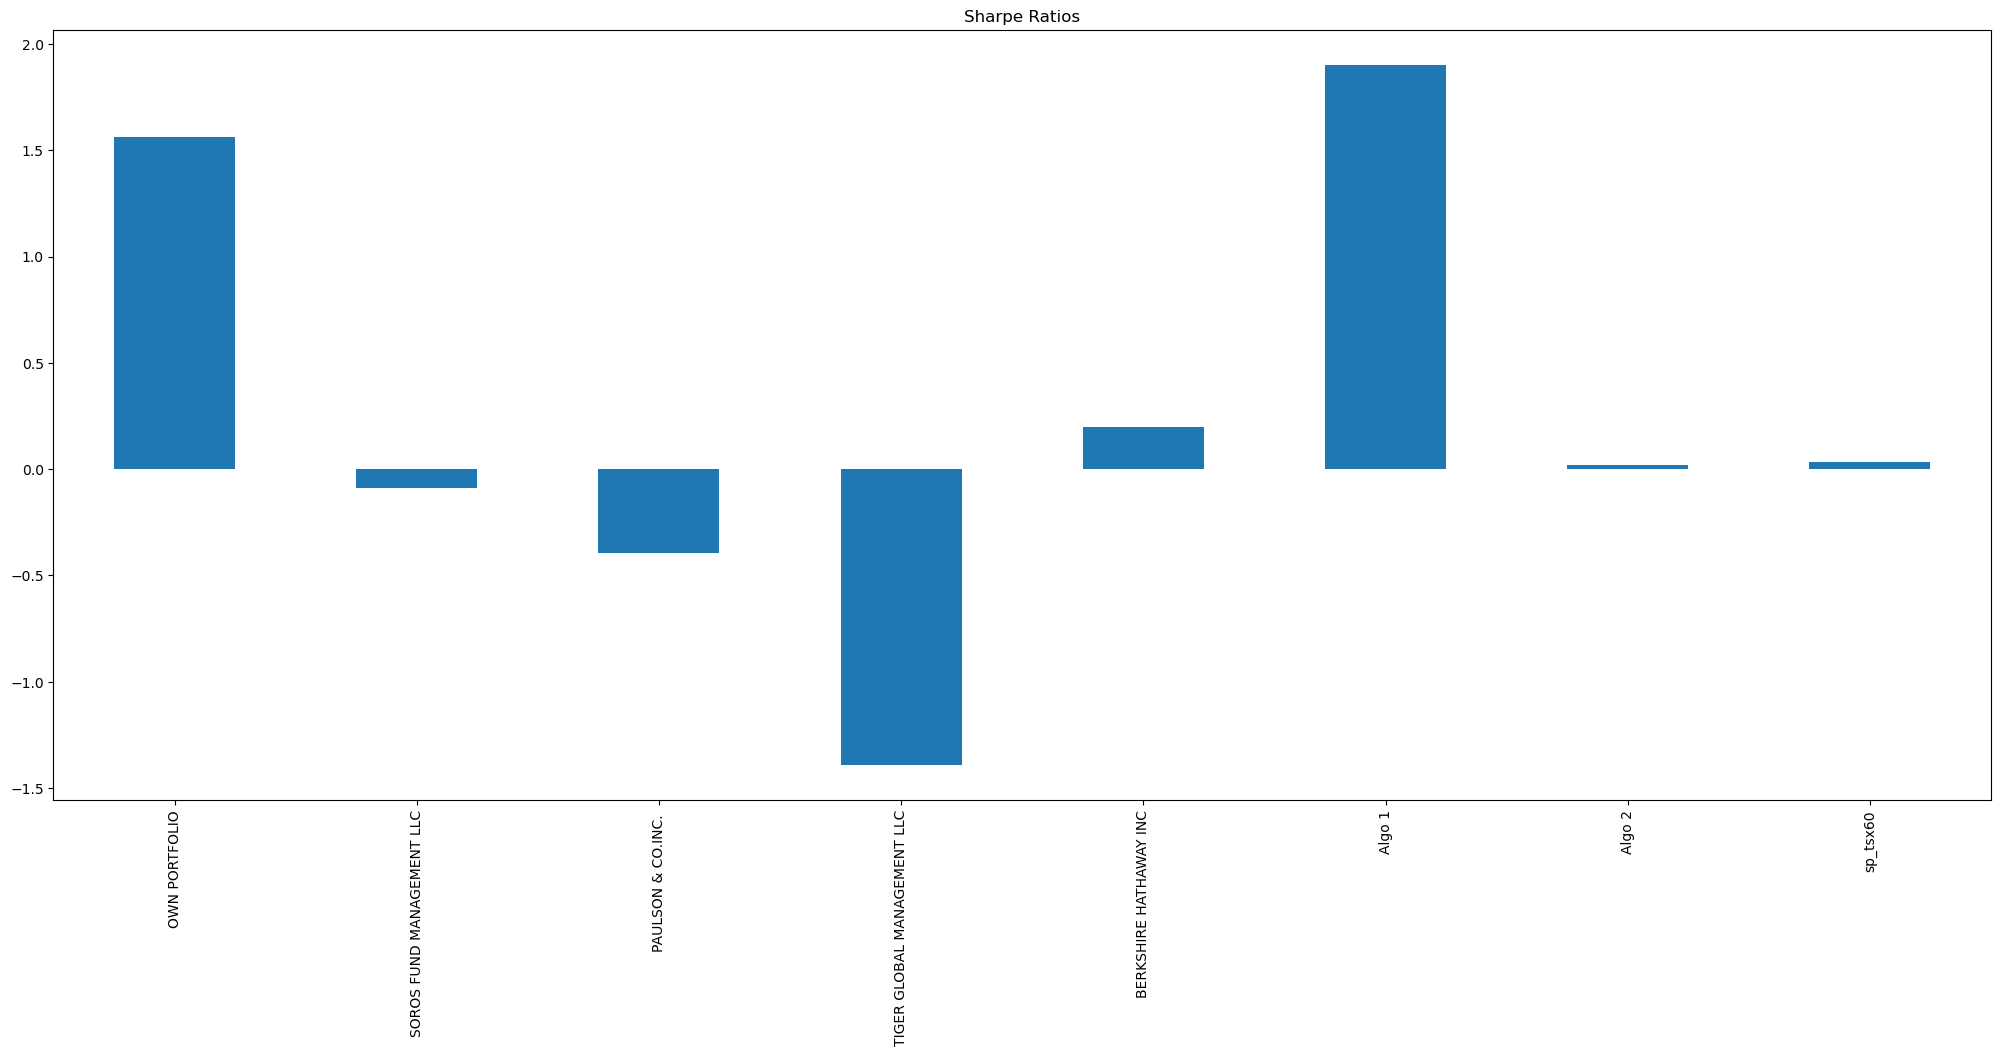

In [51]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(figsize=(25, 10), kind = "bar", title = "Sharpe Ratios")

### How does your portfolio do?

My portfolio performed second best to Algo 1 but it did very well compared to the rest. I expect a call from George Soros and Warren Buffet tomorrow. 